# Normalize Data


- There are namy ways of quantizing (normalizing) the data
- The most popular is to normalize data in the range of 0 to 1
- I chose to represent data as Int8 (-128,127) because of the currently available 4 TOPS TPU ([Google Coral](https://www.amazon.com/s?k=Google+Coral&ref=bl_dp_s_web_0)) using [TensorFlow Lite](https://coral.ai/docs/edgetpu/models-intro/)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-1">Normalize Data</a></span></li><li><span><a href="#Fetch-DataFrame-from-the-CSV-file" data-toc-modified-id="Fetch-DataFrame-from-the-CSV-file-2">Fetch DataFrame from the CSV file</a></span></li><li><span><a href="#Explore-the-Dataset" data-toc-modified-id="Explore-the-Dataset-3">Explore the Dataset</a></span><ul class="toc-item"><li><span><a href="#Describe-the-original-data" data-toc-modified-id="Describe-the-original-data-3.1">Describe the original data</a></span></li><li><span><a href="#Number-the-column-names" data-toc-modified-id="Number-the-column-names-3.2">Number the column names</a></span></li><li><span><a href="#Plot-the-original-data" data-toc-modified-id="Plot-the-original-data-3.3">Plot the original data</a></span></li></ul></li><li><span><a href="#Function-to-normalize-the-data" data-toc-modified-id="Function-to-normalize-the-data-4">Function to normalize the data</a></span><ul class="toc-item"><li><span><a href="#Run-quantize_column-function" data-toc-modified-id="Run-quantize_column-function-4.1">Run quantize_column function</a></span></li></ul></li><li><span><a href="#Draw-plots" data-toc-modified-id="Draw-plots-5">Draw plots</a></span></li><li><span><a href="#Write-DataFrame-to-the-CSV-file" data-toc-modified-id="Write-DataFrame-to-the-CSV-file-6">Write DataFrame to the CSV file</a></span></li></ul></div>

# Fetch DataFrame from the CSV file

In [37]:
date_format = "yyyy.mm.dd" # 2007.04.05
show_help = true
include("dataset_IO.jl") 


        usage:
              show_help = true
              include("dataset_IO.jl") 
    

        usage:
              # returns a DataFrame with all available data sets (name, file_path)
              df = available_datasets() 
    

        usage: 
              # 5th dataset: DJIA, 
              # 2nd column: file-name
              dataset_file_name = available_datasets()[5,2] 
    

        usage: 
            df = fetch_dataset(
                              dataset_file_name, 
                              date_format="u/dd/yy", # format the saved dates are in
                              dir="/mnt/data/indicators/original/") # location of your data directory
    

        usage: 
              include("dataset_IO.jl") 
              file_path = save_dataset(
                                       df::DataFrame,
                                       file_name="my_file_name.csv", 
                                       dir="/mnt/data/indicators/derived/"
    


In [ ]:

dataset_file_name = available_datasets()[14,2] # row 5, column 2 = TPLGX.csv

df = fetch_dataset(dataset_file_name, date_format)

size(df)

# Explore the Dataset

## Describe the original data

In [16]:
using Statistics 
describe(df[:, 2])

Summary Stats:
Length:         254
Missing Count:  0
Mean:           50.251851
Minimum:        37.110001
1st Quartile:   46.092500
Median:         49.170001
3rd Quartile:   53.557501
Maximum:        65.529999
Type:           Float64


# Function to normalize the data

- takes a column (an array) of data as an input
- calculates minimum value of the column
- calculates maximum value of the column
- for each row it calculates:

$$ normalized_i = \frac{(value_i - min_{all})}{(max_{all} - min_{all})} $$

OR 

$$ x_i = \frac{(x_i - μ)}{σ} $$

where:
- μ  - **mean** of the whole population
- σ - **standard deviation** of the whole population

## Run quantize_column function

In [23]:
data_original = df[:,6] # keep original for display comparison later

include("quantize.jl")
quantize_column!(df, 6)

using Statistics 
describe( df[:,6] )

bias for 0 value: -1.3057707111731671
Summary Stats:
Length:         254
Missing Count:  0
Mean:           -10.732283
Minimum:        -128.000000
1st Quartile:   -49.000000
Median:         -20.000000
3rd Quartile:   20.000000
Maximum:        127.000000
Type:           Float64


## Number the column names

In [24]:
# sample the values in the columns
columns = names(df)
for i in 1:length(columns)
    println(i, " ", columns[i])
end

1 Date
2 Open
3 High
4 Low
5 Close
6 Adj Close
7 Volume


# Draw plots

If the normalization above was done right, the plots retain exactly same shape, regardless that y-axis (vertical) is scaled.

- https://docs.juliaplots.org/latest/layouts/

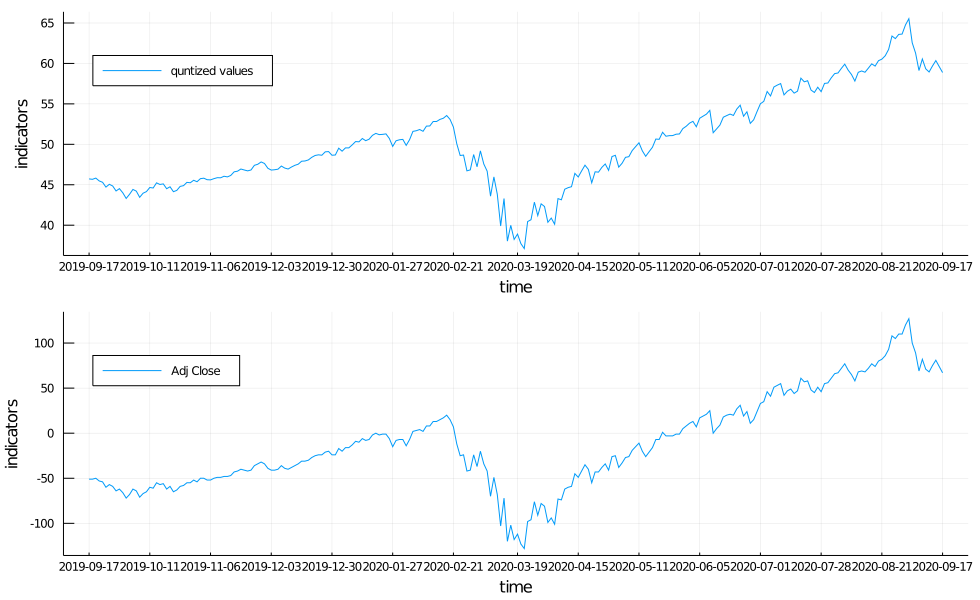

In [25]:
using Plots

rows = 1:254
gr()
plot(          df[ rows,1 ], # x-axis: dates
               [  data_original         df[rows,6]   ], # y-axis
    label    = ["quntized values" columns[6]]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 600), # width, height
    layout = (2, 1) # number of graphs: vertically, horizontally
    )

# Save DataFrame to the CSV file

LoadError: UndefVarError: file_name not defined

In [27]:
using CSV, DataFrames



file_path = save_dataset(df, dataset_file_name)


        usage: 
            include("dataset_io.jl") 
            file_path = save_dataset(dataset_file_name)
    


"D:\\Drive\\market_indicators_data\\derived\\TPLGX.csv"

In [21]:
show(df[:,original_column:normalized_column], allcols=true)

LoadError: UndefVarError: original_column not defined

In [22]:
data1 = df[:,4] # Manufacturing
data2 = df[:,6]

gr()
plot(periods, 
    [ data1  data2 ], 
    label    = ["ISM Manufacturing norm." "GDP q/q norm."],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1750, 600), # width, height
    layout = (1, 1)
    )

LoadError: UndefVarError: periods not defined